In [6]:
# Implementation of Neural Network from scratch
# Author: Tushar Mittal

In [89]:
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import normalize, StandardScaler
import matplotlib.pyplot as plt

In [22]:
# Apply activation function to input matrix (used in Forward Pass)
def calc_activation(Z, activation):
    if activation == "sigmoid":
        return 1/(1+np.exp(-Z))
    if activation == "relu":
        return np.where(Z>0, Z, 0)
    if activation == "tanh":
        return np.tanh(Z)
    raise NameError("Invalid activation function")

In [23]:
# Calculate dervative of activation function (used in Backprop)
def calc_activation_derv(A, activation):
    if activation == "sigmoid":
        return A*(1-A)
    if activation == "tanh":
        return 1- np.power(A,2)
    if activation == "relu":
        return np.where(A>0, 1, 0)
    raise NameError("Invalid activation function")

In [58]:
# Initializes the weight and bias matrices
def initialize_nn(nl, layer_sizes):
    params = {}
    for i in range(nl):
        params["W"+str(i+1)] = np.random.randn(layer_sizes[i+1], layer_sizes[i]) * 0.01
        params["b"+str(i+1)] = np.zeros((layer_sizes[i+1],1))
    return params

In [90]:
# Executes a forward pass
def forward(X, params, nl, activations):
    fcache = {"A0":X}
    for i in range(nl):
        W = params["W"+str(i+1)]
        A = A_cache["A"+str(i)]
        b = params["b"+str(i+1)]
        Z = np.dot(W,A)+b
        A = calc_activation(Z,activations[i])
        fcache["Z"+str(i+1)] = Z
        fcache["A"+str(i+1)] = A
    return fcache

In [76]:
# Calculates the cost 
def calc_cost(A,Y,m):
    cost = (Y*np.log(A)) + ((1-Y)*(np.log(1-A))) 
    total_cost = -np.sum(cost, axis=1, keepdims=True)/m
    return np.squeeze(total_cost)

In [71]:
# The backpropogation algorithm to calculate derivatives 
def backprop(Y, m, nl, fcache, params, activations):
    dparams = {}
    A = fcache["A"+str(nl)]
    dA = -(np.divide(Y,A) - np.divide((1-Y),(1-A)))
    for i in range(nl, 0, -1):
        dZ = dA * calc_activation_derv(A_cache["A"+str(i)], activations[i-1])
        dW = np.dot(dZ, A_cache["A"+str(i-1)].T)/m
        db = np.sum(dZ, axis=1, keepdims=True)/m
        dA = np.dot(params["W"+str(i)].T, dZ)
        dparams["dW"+str(i)] = dW
        dparams["db"+str(i)] = db
    return dparams

In [72]:
# updates the weight and bias matrices
def update_params(nl, learning_rate, params, dparams):
    for i in range(nl):
        W = params["W"+str(i+1)]
        dW = dparams["dW"+str(i+1)]
        b = params["b"+str(i+1)]
        db = dparams["db"+str(i+1)]
        W = W - (learning_rate*dW)
        b = b - (learning_rate*db)
        params["W"+str(i+1)] = W
        params["b"+str(i+1)] = b
    return params

In [78]:
# loading the dataset
data = load_breast_cancer()
X = data.data
Y = data.target
# preprocessing the data
scaler = StandardScaler()
X = normalize(X)
# m -> no. of training examples
m = X.shape[0]
# n -> no. of features
n = X.shape[1]
Y = Y.reshape(1,m)
X = X.T

In [85]:
#defining and trinaing the model
# nl : number of layers (2 hidden + 1 output)
nl = 3
# layer_sizes : number of nodes in a layer (input+hidden+output)
layer_sizes = [30, 10, 3, 1]
# activations : type of activation used in each layer
activations = ["tanh", "tanh", "sigmoid"]
n_iter = 50
learning_rate = 0.01
costs = []

params = initialize_nn(nl, layer_sizes)
for i in range(n_iter):
    A_cache, Z_cache = forward(X, params, nl, activations)
    costs.append(calc_cost(A_cache["A"+str(nl)], Y, m))
    dparams = backprop(Y, m, nl, A_cache, Z_cache, params, activations)
    params = update_params(nl, learning_rate, params, dparams)

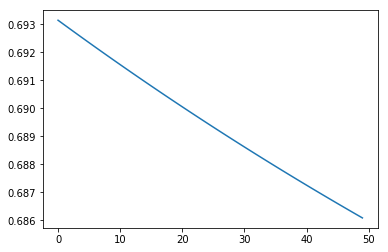

In [86]:
plt.plot(np.arange(n_iter), costs)
plt.show()

In [87]:
m = X_test.shape[0]
Y_test = Y_test.reshape(1,m)
X_test = X_test.reshape(n,m)
A_cache, Z_cache = forward(X_test, params, nl, activations)

In [57]:
A = A_cache["A"+str(nl)]
print(A)
calc_cost(A, Y_test, m)

[[0.63183246 0.63183313 0.63183365 0.63183106 0.63183524 0.63183508
  0.63183476 0.63183717 0.6318375  0.63183561 0.6318342  0.63183402
  0.63183169 0.63183141 0.63183562 0.63183167 0.63183327 0.63183589
  0.63183567 0.63183308 0.63183206 0.63183537 0.63183512 0.63183185
  0.63183486 0.63183464 0.63183138 0.63183321 0.63183181 0.63183277
  0.63182983 0.63183389 0.63183023 0.63183379 0.63183309 0.63183237
  0.63183396 0.63183515 0.63183542 0.63183383 0.63183494 0.63183496
  0.63183366 0.63183471 0.63183527 0.63183562 0.63183519 0.63183565
  0.63183419 0.63183296 0.6318328  0.63183468 0.63183374 0.63183242
  0.63183468 0.63183503 0.63183373 0.63183408 0.6318342  0.63183295
  0.63183638 0.63183335 0.63183652 0.63183371 0.63182976 0.63183262
  0.63182545 0.63183302 0.6318288  0.63182776 0.63183559 0.63183311
  0.6318319  0.63183171 0.63183544 0.63183407 0.63183446 0.63183687
  0.63183318 0.63183131 0.631835   0.63183229 0.63183413 0.63183511
  0.63183172 0.63183484 0.63183426 0.63183529 0.

array(0.67232288)